In [36]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os

In [37]:
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

In [38]:
model = ChatGoogleGenerativeAI(
    model= "gemini-2.5-flash",
    temperature=1.0,
    max_retries=2,
    google_api_key=api_key,
)

In [39]:
class BatsmanStats(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    sr: float
    boundarypercent : float
    boundaryperball : float

In [40]:
def strike_rate(State:BatsmanStats):
    sr = (State['runs']/State['balls'])*100
    State['sr'] = round(sr,2)
    return {"sr":sr}

def boundary_percent(State:BatsmanStats):
    boundary_hits = State['fours'] + State['sixes']
    boundary_percent = (boundary_hits / State['balls']) * 100
    State['boundarypercent'] = round(boundary_percent,2)
    return {'boundarypercent': boundary_percent}

def boundary_per_ball(State:BatsmanStats):  
    total_boundaries = State['fours'] + State['sixes']
    boundary_per_ball = total_boundaries / State['balls']
    State['boundaryperball'] = round(boundary_per_ball,4)
    return {'boundaryperball': boundary_per_ball}

def summerize(State:BatsmanStats):
    summ = f"Summarize the performance of a batsman who scored {State['runs']} runs off {State['balls']} balls with {State['fours']} fours and {State['sixes']} sixes. The strike rate is {State['sr']}, boundary percentage is {State['boundarypercent']}%, and boundaries per ball is {State['boundaryperball']}."
    print(summ)
    


In [41]:
graph = StateGraph(BatsmanStats)

#nodes
graph.add_node("strike_rate",  strike_rate)
graph.add_node("boundary_percent",  boundary_percent)
graph.add_node("boundary_per_ball",  boundary_per_ball)
graph.add_node("summary", summerize)

#edges
graph.add_edge(START, "strike_rate")
graph.add_edge(START, "boundary_percent")
graph.add_edge(START, "boundary_per_ball")
graph.add_edge("strike_rate", "summary")
graph.add_edge("boundary_percent", "summary") 
graph.add_edge("boundary_per_ball", "summary")
graph.add_edge("summary", END)

#compile
workflow = graph.compile()

In [42]:
initial_state ={
    "runs" : 120,
    "balls" : 75,
    "fours" : 10,
    "sixes" : 8
    }
final_state = workflow.invoke(initial_state)
print(final_state)

Summarize the performance of a batsman who scored 120 runs off 75 balls with 10 fours and 8 sixes. The strike rate is 160.0, boundary percentage is 24.0%, and boundaries per ball is 0.24.
{'runs': 120, 'balls': 75, 'fours': 10, 'sixes': 8, 'sr': 160.0, 'boundarypercent': 24.0, 'boundaryperball': 0.24}


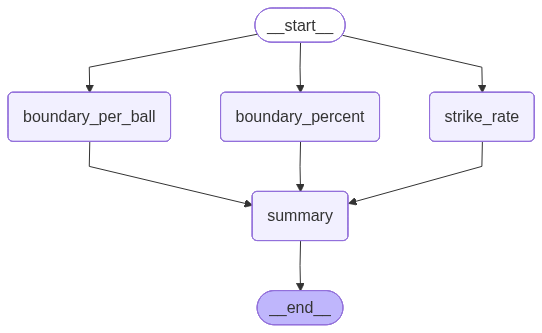

In [43]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())